# Technical Assessment for Data Scientist Role

This script address the tasks outlined in the technical assessment comprehensively.

## Part 2: Statistical Analysis
### **Regression Analysis:**
● Using a dataset of house prices and features (e.g., size, number of bedrooms, location),
perform a linear regression analysis to predict house prices.


### Import necessary libraries and independencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Load the CSV file

In [17]:
df = pd.read_csv('dataset_2.csv', skipinitialspace=True) # Load the csv file with leading spaces

# Trim leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Trim leading/trailing whitespace from each value in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_19708\2309998477.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Data Preparation

In [14]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split the data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Exploratory Data Analysis (EDA)

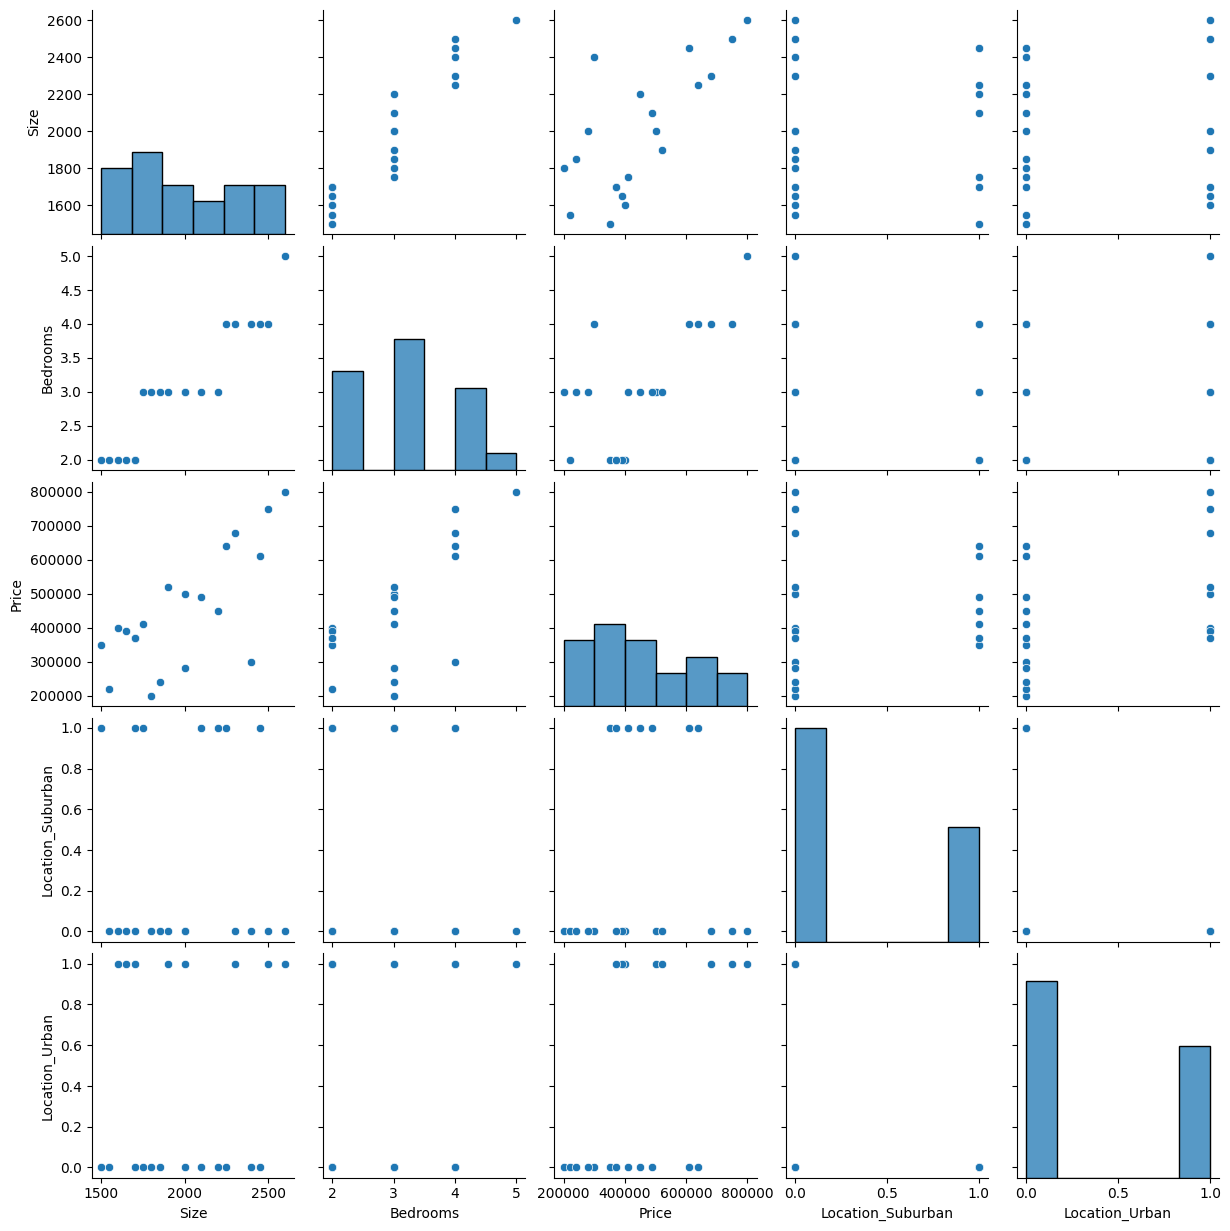

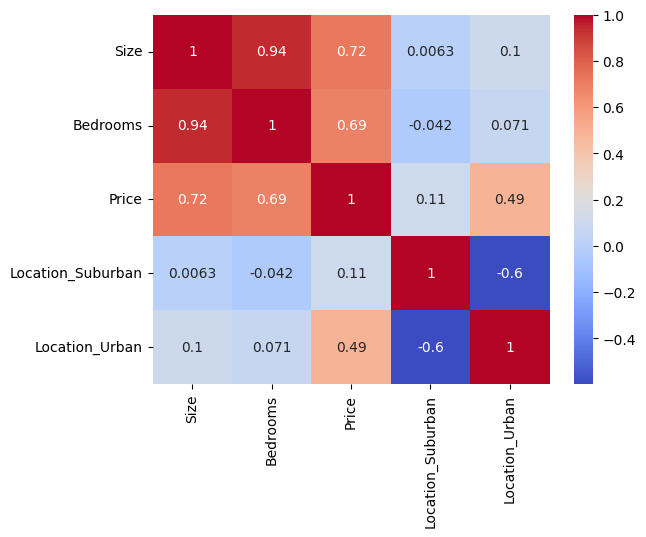

In [16]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


**Pairplot**

The Pairpolt shows the pairwise relationships and distributions of all variables.
* Diagonal plots show distributions of individual variables.
* Off-diagonal plots show scatter plots between pairs of variables.

This visualization helps in understanding the spread and relationships between different features.

**Correlation Heatmap**

The correlation heatmap visually represents the strength and direction of relationships between different variables in the dataset.
* Size vs. Bedrooms (0.94): Strong positive correlation. Larger houses tend to have more bedrooms.
* Size vs. Price (0.72): Strong positive correlation. Larger houses generally have higher prices.
* Bedrooms vs. Price (0.69): Moderate positive correlation. More bedrooms tend to be associated with higher prices.
* Location_Suburban vs. Price (0.11): Weak positive correlation.
* Location_Urban vs. Price (0.49): Moderate positive correlation.

This heatmap helps in identifying which features have the most significant impact on house prices.

### Regression Model

In [19]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"R² (train): {r2_train}")
print(f"R² (test): {r2_test}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R² (train): 0.9346828719602323
R² (test): 0.9064855730319527
MAE: 23671.949483472374
MSE: 808899793.2736093
RMSE: 28441.163711662877


* **R² (train): 0.935**
Indicates that 93.5% of the variability in house prices is explained by the model on the training data.
* **R² (test): 0.906**
Indicates that 90.6% of the variability in house prices is explained by the model on the test data.
Slight decrease from training R² indicates a good generalization.
* **MAE (Mean Absolute Error): 23,672**
Average absolute difference between predicted and actual prices.
Lower values indicate better predictions.
* **MSE (Mean Squared Error): 808,900**
Average squared difference between predicted and actual prices.
Sensitive to outliers due to squaring the errors.
* **RMSE (Root Mean Squared Error): 28,441**
Square root of MSE, provides error in same units as target variable (house prices).
Lower values indicate better model performance.

In [25]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                     Coefficient
Size                29910.698994
Bedrooms            84739.972193
Location_Suburban  104902.277196
Location_Urban     140442.813652


**Size (29,911):** For each additional square foot, the house price increases by approximately $29,911.

**Bedrooms (84,740):** Each additional bedroom increases the house price by approximately $84,740.

**Location_Suburban (104,902):** Houses in suburban locations are approximately $104,902 more expensive than those in rural areas (reference category).

**Location_Urban (140,443):** Houses in urban locations are approximately $140,443 more expensive than those in rural areas (reference category).

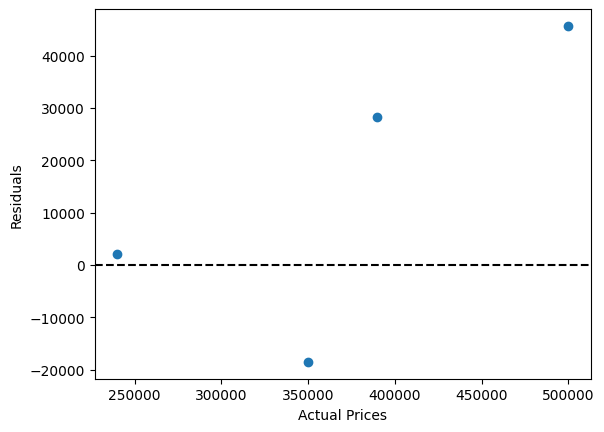

In [23]:
# Residual plot
plt.scatter(y_test, y_pred_test - y_test)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

The residual plot is used to visualize the differences between the observed values and the predicted values from the regression model

**Interpretation:** 

***Residuals:*** These are the differences between the actual and predicted values (Residual = Actual - Predicted).

***Pattern:*** Ideally, residuals should be randomly scattered around zero without any discernible pattern. This indicates that the model's predictions are unbiased and that the model captures the relationship between the variables well. 

***Outliers:*** Points that are far from the rest of the data can indicate outliers. These are cases where the model’s prediction is far off from the actual value.

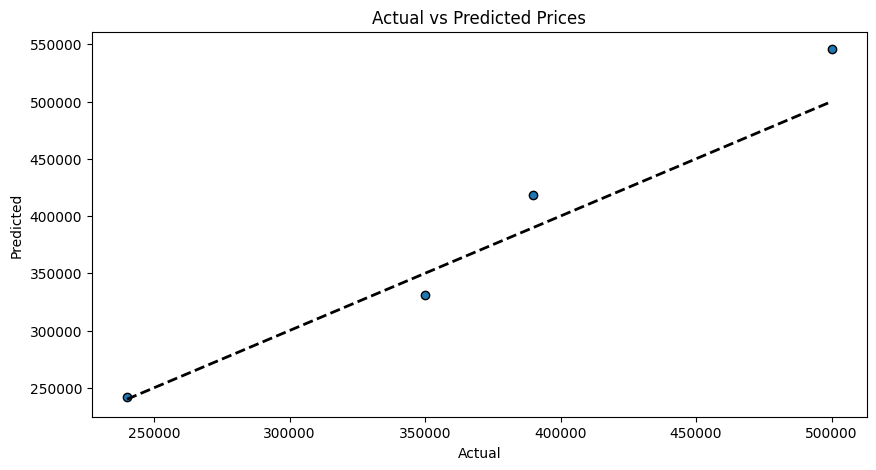

In [24]:
# Prediction vs Actual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

The prediction vs actual plot compares the predicted values from the regression model with the actual observed values. It helps in visualizing the accuracy and performance of the model.

***Diagonal Line (Ideal Line):*** The 45-degree diagonal line (y = x) represents the points where the predicted values exactly match the actual values.

***Points on the Line:*** Points that lie on or close to the diagonal line indicate accurate predictions.

***Points above the Line:*** Points above the line indicate over-predictions (predicted value is higher than the actual value).

***Points below the Line:*** Points below the line indicate under-predictions (predicted value is lower than the actual value).

### Summary

*The regression analysis indicates that house prices are strongly influenced by the size of the house and the number of bedrooms. The location also plays a significant role, with urban and suburban houses being more expensive than rural ones.*